In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from scipy.io import arff

#Importing Seismic Bumps Dataset
dataset, meta = arff.loadarff('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/classification-models/Seismic-Bumps/data/seismic-bumps.arff')
data = pd.DataFrame(dataset)
data
X = data.iloc[:, :18].values
Y = data.iloc[:, 18].values

print(data)
print(X.shape)
print(Y.shape)

     seismic seismoacoustic shift  genergy  gpuls  gdenergy  gdpuls ghazard  \
0       b'a'           b'a'  b'N'  15180.0   48.0     -72.0   -72.0    b'a'   
1       b'a'           b'a'  b'N'  14720.0   33.0     -70.0   -79.0    b'a'   
2       b'a'           b'a'  b'N'   8050.0   30.0     -81.0   -78.0    b'a'   
3       b'a'           b'a'  b'N'  28820.0  171.0     -23.0    40.0    b'a'   
4       b'a'           b'a'  b'N'  12640.0   57.0     -63.0   -52.0    b'a'   
...      ...            ...   ...      ...    ...       ...     ...     ...   
2579    b'b'           b'a'  b'W'  81410.0  785.0     432.0   151.0    b'b'   
2580    b'b'           b'a'  b'W'  42110.0  555.0     213.0   118.0    b'a'   
2581    b'b'           b'a'  b'W'  26960.0  540.0     101.0   112.0    b'a'   
2582    b'a'           b'a'  b'W'  16130.0  322.0       2.0     2.0    b'a'   
2583    b'a'           b'a'  b'W'  12750.0  235.0     -10.0   -10.0    b'a'   

      nbumps  nbumps2  nbumps3  nbumps4  nbumps5  n

In [2]:
meta

Dataset: seismic-bumps
	seismic's type is nominal, range is ('a', 'b', 'c', 'd')
	seismoacoustic's type is nominal, range is ('a', 'b', 'c', 'd')
	shift's type is nominal, range is ('W', 'N')
	genergy's type is numeric
	gpuls's type is numeric
	gdenergy's type is numeric
	gdpuls's type is numeric
	ghazard's type is nominal, range is ('a', 'b', 'c', 'd')
	nbumps's type is numeric
	nbumps2's type is numeric
	nbumps3's type is numeric
	nbumps4's type is numeric
	nbumps5's type is numeric
	nbumps6's type is numeric
	nbumps7's type is numeric
	nbumps89's type is numeric
	energy's type is numeric
	maxenergy's type is numeric
	class's type is nominal, range is ('1', '0')

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
X[:,1] = labelencoder.fit_transform(X[:,1])
X[:,2] = labelencoder.fit_transform(X[:,2])
X[:,7] = labelencoder.fit_transform(X[:,7])
Y = labelencoder.fit_transform(Y)
print(X)
print(Y)

[[0 0 0 ... 0.0 0.0 0.0]
 [0 0 0 ... 0.0 2000.0 2000.0]
 [0 0 0 ... 0.0 0.0 0.0]
 ...
 [1 0 1 ... 0.0 0.0 0.0]
 [0 0 1 ... 0.0 0.0 0.0]
 [0 0 1 ... 0.0 0.0 0.0]]
[0 0 0 ... 0 0 0]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

names = ['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB','MLPClassifier']
models = [KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear', random_state = 0),
          DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
          AdaBoostClassifier(n_estimators=10,learning_rate=1),
          LogisticRegression(random_state = 0,solver='lbfgs',multi_class='ovr'),
          GaussianNB(),
          MLPClassifier(hidden_layer_sizes=(5,),activation='relu',max_iter=100)]

accuracy= np.zeros(8)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = sklearn.metrics.accuracy_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for KNeighborsClassifier: 93.90386869871044
Accuracy for SVC: 94.3728018757327
Accuracy for DecisionTreeClassifier: 85.93200468933178
Accuracy for RandomForestClassifier: 93.90386869871044
Accuracy for AdaBoostClassifier: 94.25556858147715
Accuracy for LogisticRegression: 94.25556858147715
Accuracy for GaussianNB: 83.47010550996484
Accuracy for MLPClassifier: 91.09026963657679


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Seismic Bumps dataset model accuracy')

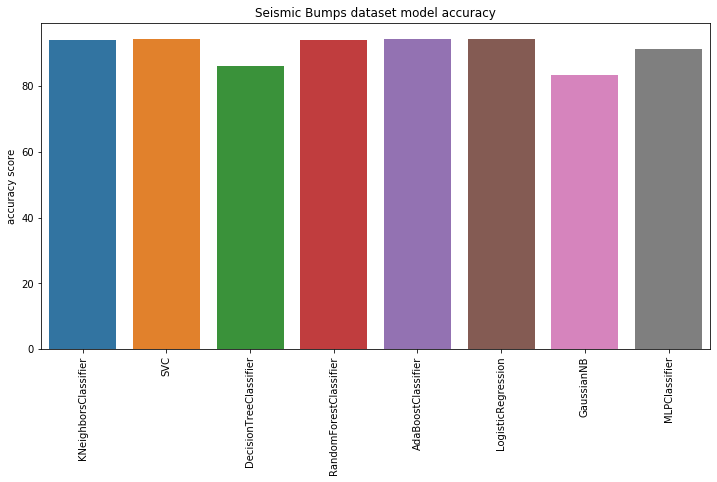

In [6]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6],accuracy[7]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Seismic Bumps dataset model accuracy')